Name: Saleh Abdallah

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Load MNIST dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Visualize sample images

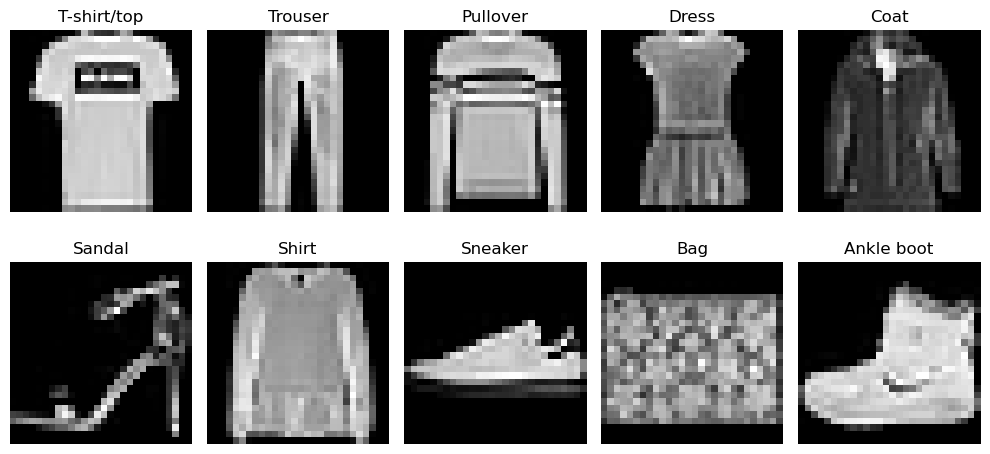

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = np.where(y_train == i)[0][0]
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Data Preprocessing

In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Label encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Build a simple FNN
model = Sequential([
    Flatten(input_shape=(28, 28)),        
    Dense(128, activation='relu'),        
    Dense(10, activation='softmax')       
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [18]:
fnn = model.fit(X_train, y_train_cat,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

Epoch 1/15
750/750 - 3s - 4ms/step - accuracy: 0.9230 - loss: 0.2062 - val_accuracy: 0.8901 - val_loss: 0.3146
Epoch 2/15
750/750 - 3s - 4ms/step - accuracy: 0.9256 - loss: 0.2008 - val_accuracy: 0.8932 - val_loss: 0.3160
Epoch 3/15
750/750 - 3s - 4ms/step - accuracy: 0.9266 - loss: 0.1956 - val_accuracy: 0.8929 - val_loss: 0.3116
Epoch 4/15
750/750 - 3s - 4ms/step - accuracy: 0.9301 - loss: 0.1878 - val_accuracy: 0.8907 - val_loss: 0.3241
Epoch 5/15
750/750 - 3s - 4ms/step - accuracy: 0.9316 - loss: 0.1845 - val_accuracy: 0.8917 - val_loss: 0.3178
Epoch 6/15
750/750 - 3s - 4ms/step - accuracy: 0.9324 - loss: 0.1813 - val_accuracy: 0.8884 - val_loss: 0.3361
Epoch 7/15
750/750 - 3s - 4ms/step - accuracy: 0.9355 - loss: 0.1746 - val_accuracy: 0.8944 - val_loss: 0.3206
Epoch 8/15
750/750 - 3s - 4ms/step - accuracy: 0.9374 - loss: 0.1711 - val_accuracy: 0.8920 - val_loss: 0.3275
Epoch 9/15
750/750 - 3s - 4ms/step - accuracy: 0.9377 - loss: 0.1665 - val_accuracy: 0.8903 - val_loss: 0.3408
E

Model Evaluation

In [19]:
# Predictions 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


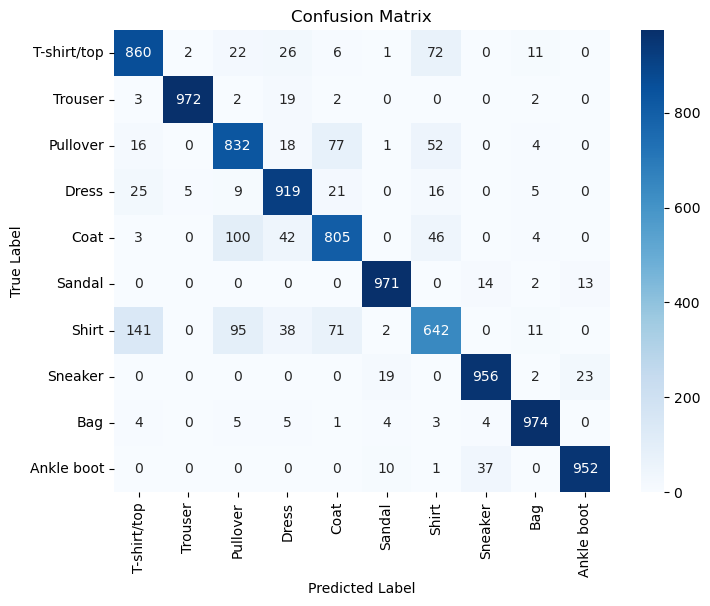

In [20]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [21]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.83      0.81      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.82      0.81      0.81      1000
      Sandal       0.96      0.97      0.97      1000
       Shirt       0.77      0.64      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Interpretation of Results

Accuracy: 0.89 - The model correctly classifies 89% of the test images.

The model performanced well on Trouser, Sandal, Sneaker, Bag, Ankle boot classes with high precision and recall which means the model handles these classes very well. Slightly weaker performance on Coat and Dress classes and the least prformance was on Shirt and Pullover classes.